## Author: Chobi Rani Sahu

# **Gold Price Prediction**

In this project, our main objective is to predict the price of gold. Here, we have a labelled dataset hence supervised machine learning will be used. We will be using Random Forest Regressor model. The steps followed to complete the task are:

### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Importing Data

In [2]:
# loading the csv data to a Pandas DataFrame
from pathlib import Path
csvpath = Path('D:/Downloads/archive/gld_price_data.csv')
gold_data = pd.read_csv(csvpath)
print("Data imported successfully")

Data imported successfully


In [3]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


### 3. Exploring the Data

In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### 4. Data Visualisation

Correlation:
1. Positive Correlation
2. Negative Correlation

In [9]:
correlation = gold_data.corr()

<AxesSubplot:>

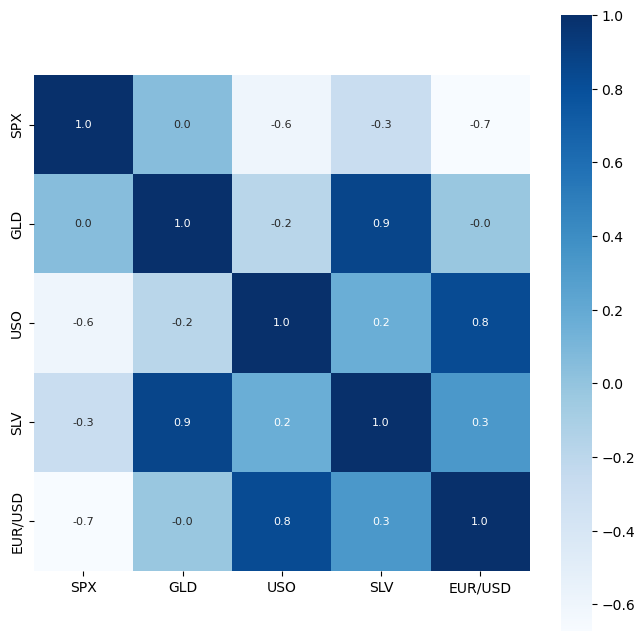

In [10]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

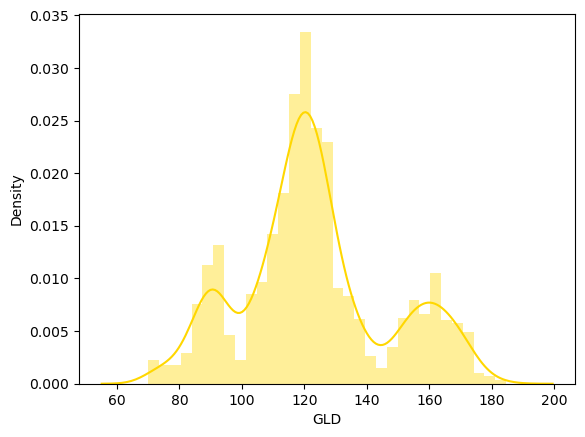

In [12]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='gold')

### 5. Preparing the data

Dividing the data into attributes(inputs) and labels(outputs).

In [13]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


### 6. Splitting the data for model building

Splitting the data into training and test sets by using Scikit-Learn's built-in train_test_split() method.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

### 7. Training the model

Building a Random Forest Regressor model

In [17]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

### 8. Making Predictions
Predicting the prices from the test values using our trained model.

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[168.71129931  81.93730002 116.36130006 127.76660098 120.81650102
 154.83009719 150.32669783 126.12879988 117.52049888 125.91180082
 116.7213011  171.96810106 141.68569887 168.0824989  115.01140025
 117.56250065 139.07330326 170.1984011  159.8753027  158.08480027
 155.10140008 124.78610035 176.30380014 157.47950349 125.2956003
  93.77139961  77.52420027 120.61960024 119.10879965 167.52669933
  88.13490045 125.09549995  91.17810086 117.82479983 121.18689892
 136.67500021 115.36770143 115.20290088 149.26390048 107.11160133
 104.58860249  87.03219781 126.47650052 117.95250019 152.66309908
 119.54220018 108.26969999 107.9724983   93.07010019 126.93219855
  75.62370025 113.62929901 121.5132999  111.33169901 118.85699894
 120.97269965 158.96400003 168.00490116 146.83479656  85.88959851
  94.57810025  86.9977984   90.46009997 119.11280065 126.46120061
 127.40240049 169.3302999  122.28739909 117.4065989   98.78640077
 167.83540132 142.9262983  132.53500228 121.17730225 121.16369932
 119.839400

### 8. Evaluating the model

In [25]:
# R squared error
from sklearn import metrics
print("R squared value: ", metrics.r2_score(Y_test, test_data_prediction))

R squared value:  0.9890262023399271


### 9. Compare the Actual Values and Predicted Values in a Plot

In [22]:
Y_test = list(Y_test)

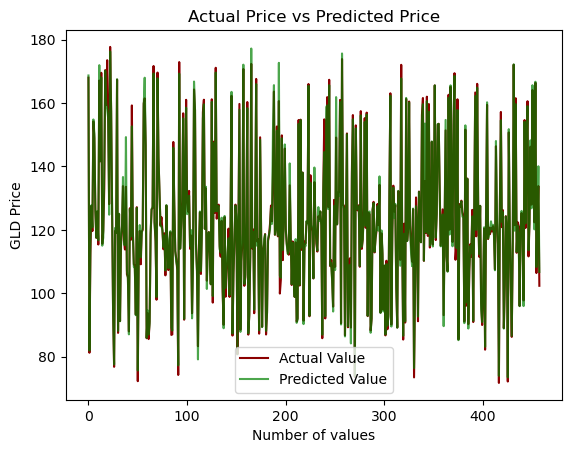

In [23]:
plt.plot(Y_test, color='darkred', label = 'Actual Value', alpha=1)
plt.plot(test_data_prediction, color='green', label='Predicted Value', alpha=0.7)
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

## Conclusion
In this task we successfully created and implemented a Random Forest Regressor Model to predict the price of gold. This Random Forest Regression Model has an R squared value of **0.9897**.
